# Logistic Regression Regularization with Wine Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## Load and Explore Dataset

In [2]:
# Load the dataset using sklearn
wine = load_wine()
X = wine.data
y = wine.target

# Convert to DataFrame for exploration
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

# Show the first few rows of the dataset
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
# Basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [4]:
# Statistical summary of the dataset
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [5]:
# Check for missing values
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

## Preprocessing and Modeling

In [6]:
# Split features and target
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Train L1 and L2 models
model_l1 = LogisticRegression(penalty='l1', solver='saga', max_iter=5000, multi_class='multinomial')
model_l2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=5000, multi_class='multinomial')

model_l1.fit(X_train_scaled, y_train)
model_l2.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=5000, multi_class='multinomial')

In [8]:
# Evaluate model performance
accuracy_l1 = accuracy_score(y_test, model_l1.predict(X_test_scaled))
accuracy_l2 = accuracy_score(y_test, model_l2.predict(X_test_scaled))

print(f"L1 Regularization Accuracy: {accuracy_l1:.2f}")
print(f"L2 Regularization Accuracy: {accuracy_l2:.2f}")

L1 Regularization Accuracy: 1.00
L2 Regularization Accuracy: 1.00


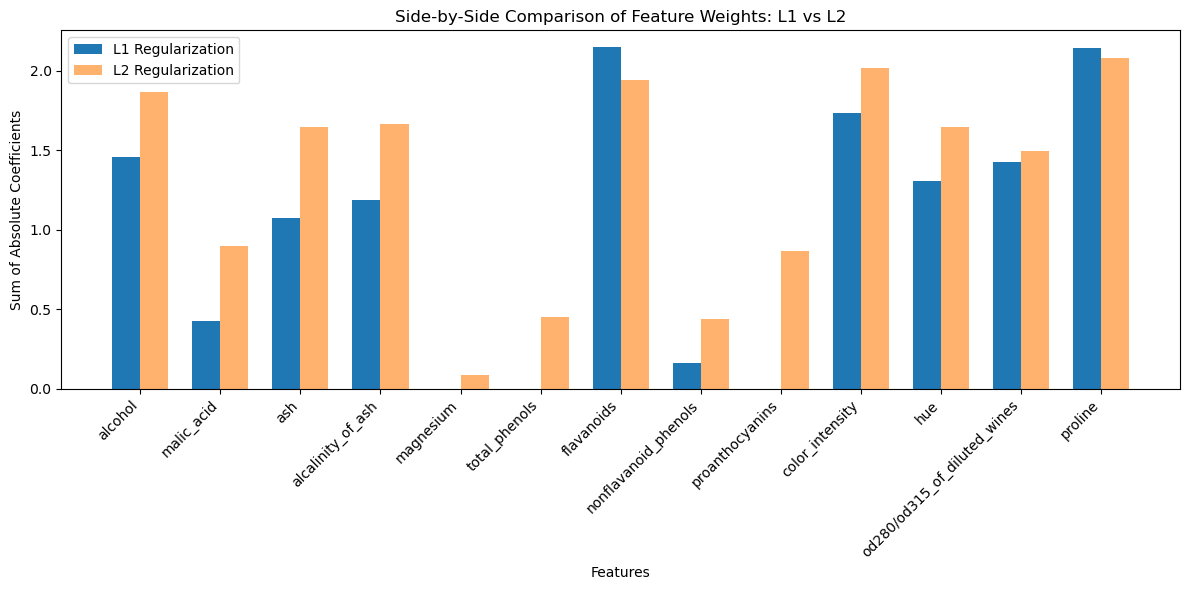

In [9]:
# Compare coefficients
coeffs_l1 = abs(model_l1.coef_).sum(axis=0)
coeffs_l2 = abs(model_l2.coef_).sum(axis=0)

features = wine.feature_names
x = np.arange(len(features))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, coeffs_l1, width, label='L1 Regularization')
plt.bar(x + width/2, coeffs_l2, width, label='L2 Regularization', alpha=0.6)
plt.xticks(x, features, rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Sum of Absolute Coefficients')
plt.title('Side-by-Side Comparison of Feature Weights: L1 vs L2')
plt.legend()
plt.tight_layout()
plt.show()

This bar chart shows how L1 and L2 regularization affect feature importance in logistic regression. L1 (blue) sets some coefficients to zero, highlighting only the most important features, while L2 (orange) keeps all features but reduces their influence. Key features like `flavanoids` and `proline` are important in both methods, showing they're strong predictors.